# Using OpenSBT with the CARLA Simulator

<div class="alert alert-block alert-warning">

**REQUIREMENTS**

_Hardware_

| Component| Requirements |
| --- | --- |
| CPU | Quad-core Intel or AMD, 2.5 GHz or faster |
| GPU | NVIDIA GeForce 960 GTX or higher with 8 GB VRAM or more |
| RAM | 32 GB or more |

_Software_

* Ubuntu 20.04
* Python 3.8
* Docker engine (see [here](https://docs.docker.com/engine/install/ubuntu/#install-using-the-repository)) with `sudo`-less access (see [here](https://docs.docker.com/engine/install/linux-postinstall/#manage-docker-as-a-non-root-user))
* NVIDIA Containter Toolkit (see [here](https://docs.nvidia.com/datacenter/cloud-native/container-toolkit/install-guide.html#installation-guide))
* Internet access (for pulling Docker images and dependencies)

</div>

<div class="alert alert-block alert-danger">

**NOTE:** In case the following script failes to to an error related to an Ubuntu key server, just re-run it after a short while. From time to time, the server fails to respond.

</div>

<div class="alert alert-block alert-danger">

**NOTE:** Make sure to set the `DISPLAY` variable to the correct value for your setup! To check whether it is set correctly, open a terminal on the screen you would like your visualization to be displayed and run `echo $DISPLAY`.

</div>

In [ ]:
In this tutorial we show how to run OpenSBT to test an AEB Agent in the CARLA Simulator. The AEB Agent is a real AEB model provided as an FMI (??).

In [ ]:
**Scenario** ((TODO, find better place, improve))

We have created experiment 1 where the agent is to be tested in maintaining a safety distance to a pedestrian crossing his lane.

In [ ]:
%%bash

In [ ]:
%%bash

# Set up example folder.
export EXAMPLE_ROOT=$(pwd)/tmp
mkdir -p $EXAMPLE_ROOT
cd $EXAMPLE_ROOT

# Fetch all necessary software.
git clone https://git.fortiss.org/opensbt/opensbt-core.git \
    $EXAMPLE_ROOT/opensbt/core
git clone https://git.fortiss.org/opensbt/carla-runner.git \
    $EXAMPLE_ROOT/opensbt/carla
git clone https://git.fortiss.org/ff1/rosco.git \
    $EXAMPLE_ROOT/ff1/rosco
git clone https://github.com/carla-simulator/carla.git \
    --depth 1 --branch 0.9.13 \
    $EXAMPLE_ROOT/carla/simulator
git clone https://github.com/carla-simulator/scenario_runner.git \
    --depth 1 --branch v0.9.13 \
    $EXAMPLE_ROOT/carla/runner

In [3]:
# Install all Python requirements.
pip install -r $EXAMPLE_ROOT/opensbt/core/requirements.txt
pip install -r $EXAMPLE_ROOT/opensbt/carla/requirements.txt

# Build and install the CARLA runner.
cd $EXAMPLE_ROOT/opensbt/carla/
python -m build
python -m pip install --force-reinstall --no-dependencies dist/*.whl

# Set all variables used by OpenSBT and CARLA.
export DISPLAY=:10.0
export OPENSBT_CORE_PATH=$EXAMPLE_ROOT/opensbt/core
export OPENSBT_RUNNER_PATH=$EXAMPLE_ROOT/opensbt/carla
export ROSCO_PATH=$EXAMPLE_ROOT/ff1/rosco
export SHARE_PATH=$EXAMPLE_ROOT/ff1/rosco/share
export CARLA_PATH=$EXAMPLE_ROOT/carla/simulator
export SCENARIORUNNER_PATH=$EXAMPLE_ROOT/carla/runner

# Update the PYTHONPATH to include all software.
export PYTHONPATH=$CARLA_PATH/PythonAPI/carla/dist/carla-0.9.13-py3.7-linux-x86_64.egg
export PYTHONPATH=$PYTHONPATH:$CARLA_PATH/PythonAPI/carla/agents
export PYTHONPATH=$PYTHONPATH:$CARLA_PATH/PythonAPI/carla
export PYTHONPATH=$PYTHONPATH:$SCENARIORUNNER_PATH

# Load a system under test.
git clone https://git.fortiss.org/opensbt/sut-examples.git \
    --depth 1 \
    $EXAMPLE_ROOT/opensbt/examples
rm $EXAMPLE_ROOT/ff1/rosco/launch/* $EXAMPLE_ROOT/ff1/rosco/share/*
cp $EXAMPLE_ROOT/opensbt/examples/rover/rosco/launch/* $EXAMPLE_ROOT/ff1/rosco/launch
cp $EXAMPLE_ROOT/opensbt/examples/rover/rosco/share/* $EXAMPLE_ROOT/ff1/rosco/share

# Configure OpenSBT's CARLA interface to execute the system under test using the FMI agent.
sed -i -e 's/NPCAgent/FMIAgent/g' $EXAMPLE_ROOT/opensbt/core/simulation/carla_simulation.py

# Run one of the default experiments defined in OpenSBT using the CARLA.
cd $EXAMPLE_ROOT/opensbt/core/
python run.py -e 1 -n 10 -i 10 -v

Cloning into '/home/munaro/Desktop/Jupyter/tmp/opensbt/core'...
Cloning into '/home/munaro/Desktop/Jupyter/tmp/opensbt/carla'...
Cloning into '/home/munaro/Desktop/Jupyter/tmp/ff1/rosco'...
Cloning into '/home/munaro/Desktop/Jupyter/tmp/carla/simulator'...
Note: switching to 'a1b37f7f1cf34b0f6f77973c469926ea368d1507'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

Cloning into '/home/munaro/Desktop/Jupyter/tmp/carla/runner'...
Note: switching to '85109e7ce130a192d99e78a728ce5e12ea2744ca'.

You are in 'detached HEAD' state. Y

* Creating venv isolated environment...
* Installing packages in isolated environment... (setuptools>=61.0)
* Getting build dependencies for sdist...
running egg_info
creating src/carla_simulation.egg-info
writing src/carla_simulation.egg-info/PKG-INFO
writing dependency_links to src/carla_simulation.egg-info/dependency_links.txt
writing requirements to src/carla_simulation.egg-info/requires.txt
writing top-level names to src/carla_simulation.egg-info/top_level.txt
writing manifest file 'src/carla_simulation.egg-info/SOURCES.txt'
reading manifest file 'src/carla_simulation.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'src/carla_simulation.egg-info/SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing src/carla_simulation.egg-info/PKG-INFO
writing dependency_links to src/carla_simulation.egg-info/dependency_links.txt
writing requirements to src/carla_simulation.egg-info/requires.txt
writing top-level 

Cloning into '/home/munaro/Desktop/Jupyter/tmp/opensbt/examples'...
rm: cannot remove '/home/munaro/Desktop/Jupyter/tmp/ff1/rosco/share/faults': Is a directory
2023-10-13 13:32:09,452 INFO     Logging setup. Writing to file:  ./log.txt
2023-10-13 13:32:09,453 INFO     Selected experiment: 1
2023-10-13 13:32:09,453 INFO     Pymoo NSGA-II algorithm is used.
2023-10-13 13:32:09,455 INFO     Running evaluation number 1
2023-10-13 13:32:09,455 INFO     provided following values:
2023-10-13 13:32:09,455 INFO     [('PedSpeed', 0.790250687166034), ('EgoSpeed', 14.609358168496383), ('PedDist', 9.265384093738893)]
2023-10-13 13:32:09,456 INFO     provided following values:
2023-10-13 13:32:09,456 INFO     [('PedSpeed', 2.174816040168052), ('EgoSpeed', 4.767290545993591), ('PedDist', 14.91919066031663)]
2023-10-13 13:32:09,457 INFO     provided following values:
2023-10-13 13:32:09,457 INFO     [('PedSpeed', 1.6925162967255465), ('EgoSpeed', 20.044639916766144), ('PedDist', 56.30813130576019)]
20

[Infrastructure] Rendering quality was set to: Medium
If you have changed the simulation quality, please rebuild the Docker containers. Otherwise the infrastructure will not be affected.
non-network local connections being added to access control list
Getting images... Pulling... Building... Creating containers...
Creating server container carla-server-0
Creating client container carla-client-0. Installing OpenSBT requirements... Installing OpenSBT wheel... Building ROS Workspace... Starting containers... Connecting to carla-server-0... Server Version: 0.9.13. Done.
[Infrastructure] All up
[Runner] Running Scenario PedestrianCrossing_1.4061501698523995_20.583987995730922_33.508655451936825.xosc, Attempt 0.
[Runner] Executor ran into an problem while in scenario PedestrianCrossing_1.4061501698523995_20.583987995730922_33.508655451936825.xosc, agent FMIAgent.
[Runner] Trying to start the carla server...
Connecting to carla-server-0... Server Version: 0.9.13. Done.
[Runner] Running Scenar

2023-10-13 13:42:28,183 INFO     ++ removing temporary scenarios ++


n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       10 |      2 |             - |             -


2023-10-13 13:42:28,204 INFO     Running evaluation number 2
2023-10-13 13:42:28,205 INFO     provided following values:
2023-10-13 13:42:28,205 INFO     [('PedSpeed', 0.5154291959614754), ('EgoSpeed', 10.465204517852982), ('PedDist', 49.385141847899504)]
2023-10-13 13:42:28,205 INFO     provided following values:
2023-10-13 13:42:28,205 INFO     [('PedSpeed', 2.095156618475758), ('EgoSpeed', 4.118781738623757), ('PedDist', 14.45419530545377)]
2023-10-13 13:42:28,206 INFO     provided following values:
2023-10-13 13:42:28,206 INFO     [('PedSpeed', 0.5561970082662286), ('EgoSpeed', 9.40816112563554), ('PedDist', 49.43053137000071)]
2023-10-13 13:42:28,207 INFO     provided following values:
2023-10-13 13:42:28,207 INFO     [('PedSpeed', 2.7680093174858884), ('EgoSpeed', 9.40816112563554), ('PedDist', 35.48637260653922)]
2023-10-13 13:42:28,207 INFO     provided following values:
2023-10-13 13:42:28,208 INFO     [('PedSpeed', 2.382329614998535), ('EgoSpeed', 10.662244430262893), ('PedDi

[Runner] Running Scenario PedestrianCrossing_2.174816040168052_4.869192210688963_33.97969040656887.xosc, Attempt 0.
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underr

2023-10-13 13:53:46,020 INFO     ++ removing temporary scenarios ++


     2 |       20 |      4 |  0.2081523572 |         ideal


2023-10-13 13:53:46,049 INFO     Running evaluation number 3
2023-10-13 13:53:46,049 INFO     provided following values:
2023-10-13 13:53:46,049 INFO     [('PedSpeed', 2.1801513140255544), ('EgoSpeed', 4.846690880615032), ('PedDist', 33.97969040656887)]
2023-10-13 13:53:46,049 INFO     provided following values:
2023-10-13 13:53:46,049 INFO     [('PedSpeed', 2.7680093174858884), ('EgoSpeed', 9.479938661681791), ('PedDist', 35.12287056765331)]
2023-10-13 13:53:46,050 INFO     provided following values:
2023-10-13 13:53:46,050 INFO     [('PedSpeed', 0.6050870405947151), ('EgoSpeed', 4.79185749783395), ('PedDist', 15.613045845542711)]
2023-10-13 13:53:46,051 INFO     provided following values:
2023-10-13 13:53:46,051 INFO     [('PedSpeed', 2.7626740063829303), ('EgoSpeed', 9.430662455776513), ('PedDist', 35.531950384754545)]
2023-10-13 13:53:46,051 INFO     provided following values:
2023-10-13 13:53:46,052 INFO     [('PedSpeed', 2.382329614998535), ('EgoSpeed', 10.590466894216641), ('Ped

[Runner] Running Scenario PedestrianCrossing_2.382329614998535_10.590466894216641_35.49993172661843.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 11:53:53.231459 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 11:53:53.869651 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 11:53:54.350129 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 11:53:54.671758 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 11:53:54.997378 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 11:53:55.324830 / Si

2023-10-13 14:05:00,292 INFO     ++ removing temporary scenarios ++


     3 |       30 |      5 |  0.000000E+00 |             f


2023-10-13 14:05:00,325 INFO     Running evaluation number 4
2023-10-13 14:05:00,325 INFO     provided following values:
2023-10-13 14:05:00,325 INFO     [('PedSpeed', 2.1547882854839697), ('EgoSpeed', 9.3858341689684), ('PedDist', 33.61481464187055)]
2023-10-13 14:05:00,326 INFO     provided following values:
2023-10-13 14:05:00,326 INFO     [('PedSpeed', 0.8523579449323222), ('EgoSpeed', 14.789783479584546), ('PedDist', 9.265384093738893)]
2023-10-13 14:05:00,327 INFO     provided following values:
2023-10-13 14:05:00,327 INFO     [('PedSpeed', 0.5536328349350358), ('EgoSpeed', 4.726398695841643), ('PedDist', 49.069139349876195)]
2023-10-13 14:05:00,327 INFO     provided following values:
2023-10-13 14:05:00,327 INFO     [('PedSpeed', 2.1546801904525044), ('EgoSpeed', 4.733477593596209), ('PedDist', 15.869779362477903)]
2023-10-13 14:05:00,328 INFO     provided following values:
2023-10-13 14:05:00,328 INFO     [('PedSpeed', 2.174816040168052), ('EgoSpeed', 4.869192210688963), ('PedD

[Runner] Running Scenario PedestrianCrossing_2.139317767140275_9.41964712150923_48.11593197667068.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 12:05:07.451955 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 12:05:08.085625 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 12:05:08.566723 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 12:05:08.891437 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 12:05:09.216929 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 12:05:09.541821 / Sim_

2023-10-13 14:15:37,967 INFO     ++ removing temporary scenarios ++


     4 |       40 |      6 |  0.0237356577 |             f


2023-10-13 14:15:38,002 INFO     Running evaluation number 5
2023-10-13 14:15:38,003 INFO     provided following values:
2023-10-13 14:15:38,003 INFO     [('PedSpeed', 2.174816040168052), ('EgoSpeed', 6.4208662445479145), ('PedDist', 16.527118526670957)]
2023-10-13 14:15:38,003 INFO     provided following values:
2023-10-13 14:15:38,003 INFO     [('PedSpeed', 2.3904906084783972), ('EgoSpeed', 10.662244430262893), ('PedDist', 35.13663123461787)]
2023-10-13 14:15:38,004 INFO     provided following values:
2023-10-13 14:15:38,004 INFO     [('PedSpeed', 0.5831644976794632), ('EgoSpeed', 9.48249523021898), ('PedDist', 34.8411325273221)]
2023-10-13 14:15:38,005 INFO     provided following values:
2023-10-13 14:15:38,005 INFO     [('PedSpeed', 2.7680093174858884), ('EgoSpeed', 9.633849919098651), ('PedDist', 35.304315377637096)]
2023-10-13 14:15:38,005 INFO     provided following values:
2023-10-13 14:15:38,006 INFO     [('PedSpeed', 2.4901857495879436), ('EgoSpeed', 9.227735814547158), ('Ped

[Runner] Running Scenario PedestrianCrossing_2.4901857495879436_9.227735814547158_35.48617105965386.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 12:15:45.129971 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 12:15:45.766622 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 12:15:46.245742 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 12:15:46.569184 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 12:15:46.892422 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 12:15:47.216356 / Si

2023-10-13 14:26:51,745 INFO     ++ removing temporary scenarios ++


     5 |       50 |      6 |  0.000000E+00 |             f


2023-10-13 14:26:51,817 INFO     Running evaluation number 6
2023-10-13 14:26:51,817 INFO     provided following values:
2023-10-13 14:26:51,817 INFO     [('PedSpeed', 2.2519012957666114), ('EgoSpeed', 3.7911535716618543), ('PedDist', 6.071160032989461)]
2023-10-13 14:26:51,818 INFO     provided following values:
2023-10-13 14:26:51,818 INFO     [('PedSpeed', 0.5561970082662286), ('EgoSpeed', 9.404228187967982), ('PedDist', 49.441136313316136)]
2023-10-13 14:26:51,818 INFO     provided following values:
2023-10-13 14:26:51,818 INFO     [('PedSpeed', 2.7680093174858884), ('EgoSpeed', 9.48079163499589), ('PedDist', 34.835584363750726)]
2023-10-13 14:26:51,819 INFO     provided following values:
2023-10-13 14:26:51,819 INFO     [('PedSpeed', 0.6131585772006568), ('EgoSpeed', 9.40816112563554), ('PedDist', 49.43053137000071)]
2023-10-13 14:26:51,820 INFO     provided following values:
2023-10-13 14:26:51,820 INFO     [('PedSpeed', 2.7057365528446096), ('EgoSpeed', 3.598076094971086), ('Ped

[Runner] Running Scenario PedestrianCrossing_2.7680093174858884_9.48079163499589_34.835584363750726.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 12:26:58.976563 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 12:26:59.608866 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 12:27:00.089863 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 12:27:00.416325 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 12:27:00.739225 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 12:27:01.061784 / Si

2023-10-13 14:38:06,328 INFO     ++ removing temporary scenarios ++


     6 |       60 |      9 |  0.3999528051 |         ideal


2023-10-13 14:38:06,360 INFO     Running evaluation number 7
2023-10-13 14:38:06,360 INFO     provided following values:
2023-10-13 14:38:06,360 INFO     [('PedSpeed', 0.5796804480803281), ('EgoSpeed', 9.40816112563554), ('PedDist', 35.19501631131883)]
2023-10-13 14:38:06,361 INFO     provided following values:
2023-10-13 14:38:06,361 INFO     [('PedSpeed', 2.794022701906113), ('EgoSpeed', 9.230515453462061), ('PedDist', 49.723874445995904)]
2023-10-13 14:38:06,362 INFO     provided following values:
2023-10-13 14:38:06,362 INFO     [('PedSpeed', 0.6131585772006568), ('EgoSpeed', 11.192909201507293), ('PedDist', 50.703131001822406)]
2023-10-13 14:38:06,362 INFO     provided following values:
2023-10-13 14:38:06,362 INFO     [('PedSpeed', 2.7057365528446096), ('EgoSpeed', 9.227735814547158), ('PedDist', 37.725430781550344)]
2023-10-13 14:38:06,363 INFO     provided following values:
2023-10-13 14:38:06,363 INFO     [('PedSpeed', 2.7908044261575284), ('EgoSpeed', 9.479938661681791), ('Pe

[Runner] Running Scenario PedestrianCrossing_2.765797778116899_9.40816112563554_55.491363576071976.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 12:38:13.409502 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 12:38:14.043405 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 12:38:14.526438 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 12:38:14.851407 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 12:38:15.174721 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 12:38:15.502993 / Sim

2023-10-13 14:49:21,202 INFO     ++ removing temporary scenarios ++


     7 |       70 |     10 |  0.000000E+00 |             f


2023-10-13 14:49:21,238 INFO     Running evaluation number 8
2023-10-13 14:49:21,238 INFO     provided following values:
2023-10-13 14:49:21,238 INFO     [('PedSpeed', 0.5944197671795082), ('EgoSpeed', 9.478700791195427), ('PedDist', 35.1226437282277)]
2023-10-13 14:49:21,239 INFO     provided following values:
2023-10-13 14:49:21,239 INFO     [('PedSpeed', 0.5910820591382282), ('EgoSpeed', 9.40816112563554), ('PedDist', 49.43053137000071)]
2023-10-13 14:49:21,240 INFO     provided following values:
2023-10-13 14:49:21,240 INFO     [('PedSpeed', 0.602579800612645), ('EgoSpeed', 9.40816112563554), ('PedDist', 35.2108498422119)]
2023-10-13 14:49:21,240 INFO     provided following values:
2023-10-13 14:49:21,240 INFO     [('PedSpeed', 2.7680093174858884), ('EgoSpeed', 9.409398996121903), ('PedDist', 35.193256367472245)]
2023-10-13 14:49:21,241 INFO     provided following values:
2023-10-13 14:49:21,241 INFO     [('PedSpeed', 2.0553378866340926), ('EgoSpeed', 3.4661954540306374), ('PedDist

[Runner] Running Scenario PedestrianCrossing_0.5429786035353024_9.40816112563554_35.77535736684147.xosc, Attempt 0.
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underr

2023-10-13 14:58:46,676 INFO     ++ removing temporary scenarios ++


     8 |       80 |     10 |  0.0100939516 |             f


2023-10-13 14:58:46,756 INFO     Running evaluation number 9
2023-10-13 14:58:46,756 INFO     provided following values:
2023-10-13 14:58:46,756 INFO     [('PedSpeed', 2.6321215178390887), ('EgoSpeed', 9.610832829753813), ('PedDist', 49.723874445995904)]
2023-10-13 14:58:46,757 INFO     provided following values:
2023-10-13 14:58:46,758 INFO     [('PedSpeed', 0.5523543267434867), ('EgoSpeed', 9.227735814547158), ('PedDist', 35.82030461741789)]
2023-10-13 14:58:46,759 INFO     provided following values:
2023-10-13 14:58:46,759 INFO     [('PedSpeed', 2.174816040168052), ('EgoSpeed', 4.780959759156172), ('PedDist', 14.91919066031663)]
2023-10-13 14:58:46,760 INFO     provided following values:
2023-10-13 14:58:46,760 INFO     [('PedSpeed', 2.845136549257321), ('EgoSpeed', 4.7439741725553635), ('PedDist', 49.723874445995904)]
2023-10-13 14:58:46,761 INFO     provided following values:
2023-10-13 14:58:46,761 INFO     [('PedSpeed', 2.723413741636798), ('EgoSpeed', 9.40816112563554), ('PedDi

[Runner] Running Scenario PedestrianCrossing_2.174816040168052_4.780959759156172_14.91919066031663.xosc, Attempt 0.
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8306:(snd_pcm_recover) underr

2023-10-13 15:09:29,618 INFO     ++ removing temporary scenarios ++


     9 |       90 |     10 |  0.0007990993 |             f


2023-10-13 15:09:29,655 INFO     Running evaluation number 10
2023-10-13 15:09:29,655 INFO     provided following values:
2023-10-13 15:09:29,655 INFO     [('PedSpeed', 0.5944197671795082), ('EgoSpeed', 9.414760666903238), ('PedDist', 35.26351440856272)]
2023-10-13 15:09:29,656 INFO     provided following values:
2023-10-13 15:09:29,656 INFO     [('PedSpeed', 0.7366798703825025), ('EgoSpeed', 9.145576375983708), ('PedDist', 49.723874445995904)]
2023-10-13 15:09:29,657 INFO     provided following values:
2023-10-13 15:09:29,657 INFO     [('PedSpeed', 0.5944197671795082), ('EgoSpeed', 9.40816112563554), ('PedDist', 35.801132910732434)]
2023-10-13 15:09:29,657 INFO     provided following values:
2023-10-13 15:09:29,658 INFO     [('PedSpeed', 2.7568775130015886), ('EgoSpeed', 7.2333194991238114), ('PedDist', 49.723874445995904)]
2023-10-13 15:09:29,658 INFO     provided following values:
2023-10-13 15:09:29,658 INFO     [('PedSpeed', 0.5561970082662286), ('EgoSpeed', 10.633861140198714), (

[Runner] Running Scenario PedestrianCrossing_0.5944197671795082_9.40816112563554_35.801132910732434.xosc, Attempt 0.
pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
[Simulator] Mode: Synchronous [True], Temporal Resolution [0.1], Maximal Substeps [10], Substep Resolution [0.01]
 Map loaded. Destroying 1 actors
calling init/master service
initialized do step service
ScenarioManager: Running scenario PedestrianCrossing
======[Agent] Wallclock_time = 2023-10-13 13:09:36.870568 / Sim_time = 0.10000000149011612
======[Agent] Wallclock_time = 2023-10-13 13:09:37.505661 / Sim_time = 0.20000000298023224
======[Agent] Wallclock_time = 2023-10-13 13:09:37.987039 / Sim_time = 0.30000000447034836
======[Agent] Wallclock_time = 2023-10-13 13:09:38.313375 / Sim_time = 0.4000000059604645
======[Agent] Wallclock_time = 2023-10-13 13:09:38.635259 / Sim_time = 0.5000000074505806
======[Agent] Wallclock_time = 2023-10-13 13:09:38.960899 / Si

2023-10-13 15:22:34,045 INFO     ++ removing temporary scenarios ++


    10 |      100 |     10 |  0.0007990993 |             f


2023-10-13 15:22:34,080 INFO     =====[NSGA2] Writing results to: 
2023-10-13 15:22:34,080 INFO     /home/munaro/Desktop/Jupyter/tmp/opensbt/core/results/PedestrianCrossingStartWalk/NSGA2/13-10-2023_15-22-34/
2023-10-13 15:23:05,658 INFO     ====== Algorithm search time: 6624.63 sec


Error while terminating subprocess (pid=236349): 


Once the images are pulled, the containers built, and the experiment started, a visualization similar to this one will pop up for each scenario instance:

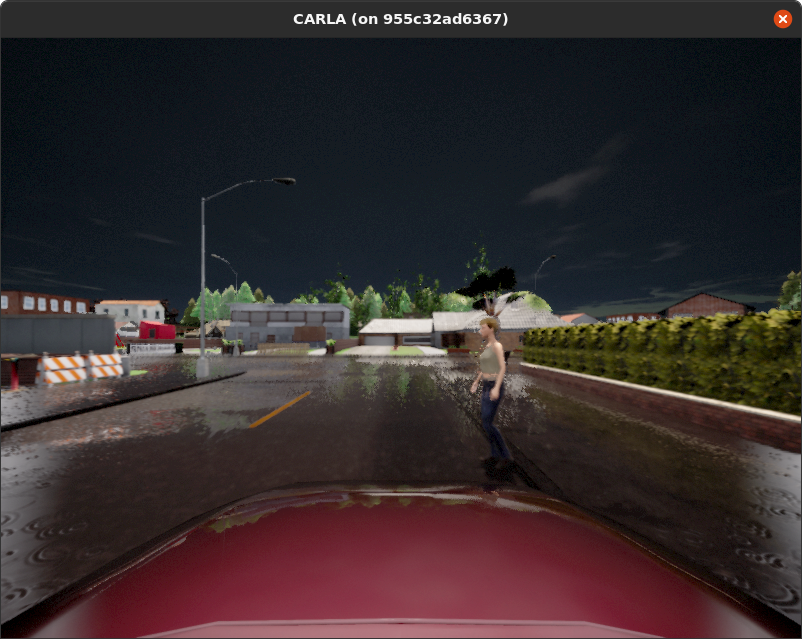

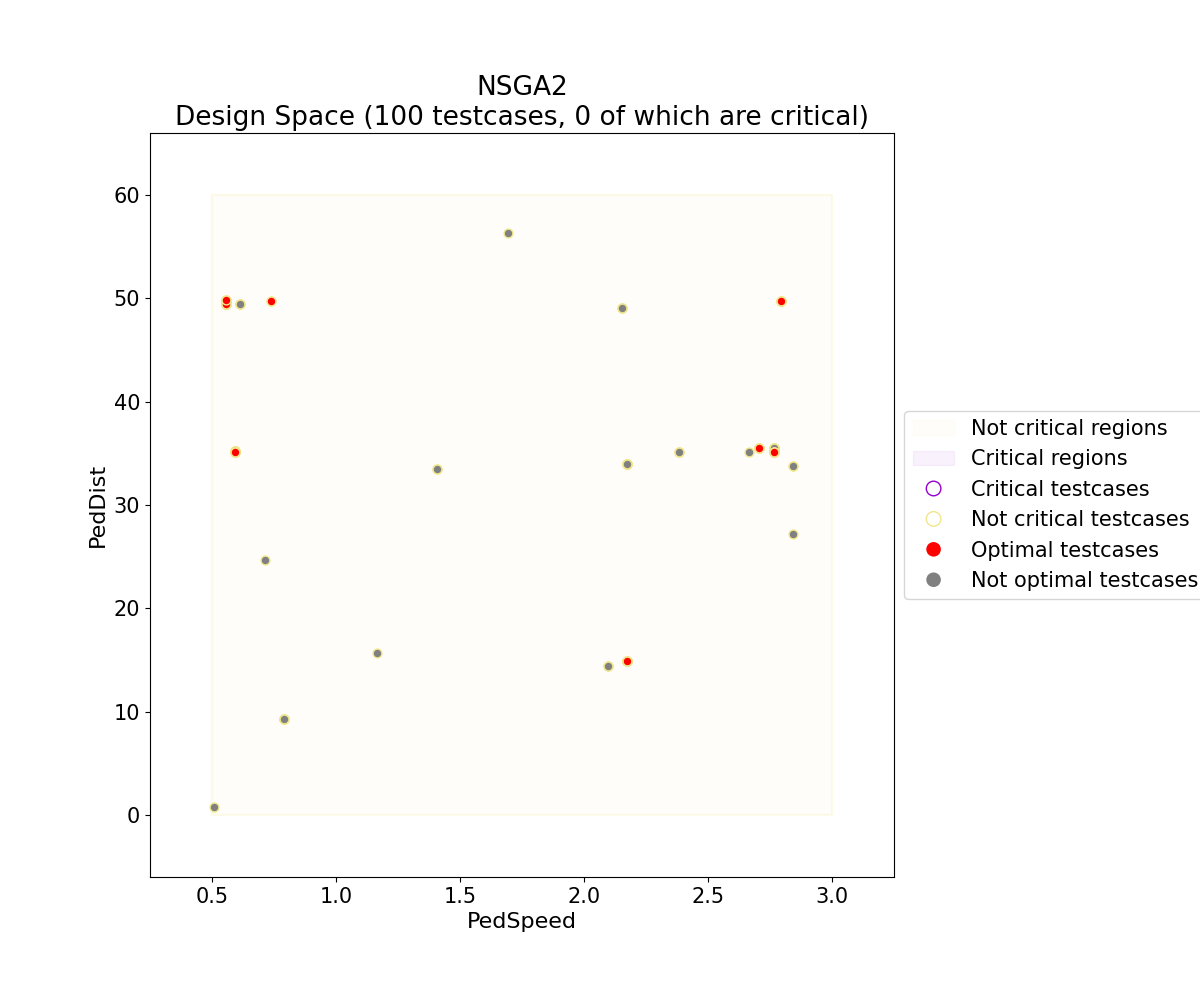

In [4]:
from os import listdir
from random import choice
from IPython.display import Image

RESULTS_DIR = "tmp/opensbt/core/results"

# As we have executed only one experiments, we can access it randomly.
by_scenario = "{}/{}".format(RESULTS_DIR, choice(listdir(RESULTS_DIR)))
by_algorithm = "{}/{}".format(by_scenario, choice(listdir(by_scenario)))
by_time = "{}/{}".format(by_algorithm, choice(listdir(by_algorithm)))

Image(filename="{}/design_space/PedSpeed_PedDist.png".format(by_time))